<a href="https://colab.research.google.com/github/apwadkar/bio-inspired-ai/blob/main/CSE598_Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Simulated Annealing of the Ackley function

In [190]:
#@title Hyperparameters
#@markdown Hyperparameters of the Metropolis-Hastings algorithm

STD_DEV =  0.1#@param {type: "number", min: 0.1, max: 5, step: 0.1}
TERM = 0.5 #@param {type: "number", min: 0.1}
BETA =  100#@param {type: "number", min: 1, max: 100, step: 1}
INIT_TEMP =  10#@param {type: "number", min: 0, max: 100, step: 1}
COOL_ITERS =  20#@param {type: "number", min: 1, max: 100, step: 1}
ALPHA = (INIT_TEMP - TERM) / COOL_ITERS

#@markdown ---

#@markdown Number of runs

RUNS =  20#@param {type: "number"}

In [180]:
def ackley(vals):
  x, y = vals
  return -20*np.exp(-0.2*np.sqrt(0.5*(x*x+y*y))) \
    - np.exp(0.5*(np.cos(2*np.pi*x) + np.cos(2*np.pi*y))) \
    + np.e + 20

In [181]:
def prob(new_val, val, temp):
  if ackley(new_val) < ackley(val):
    return 1
  else:
    return np.exp(-np.abs(ackley(new_val) - ackley(val)) / temp)

In [191]:
# Plotting
finals = []

for _ in range(RUNS):
  temp = INIT_TEMP
  vals = np.random.uniform(-5, 5, 2)
  while temp >= TERM:
    for _ in range(BETA):
      walk = np.random.normal(0, STD_DEV, 2)
      new_val = vals + walk
      if prob(new_val, vals, temp) > np.random.uniform():
        # print(f'better point from {vals} -> {new_val} @ {temp}')
        vals = new_val
    temp -= ALPHA
  finals.append(vals)

In [193]:
def graph(vals):
  last_x, last_y = np.array(vals).T
  fig, ax = plt.subplots(1, 1, figsize=(10, 7))

  xlist = np.linspace(min(last_x) - 1, max(last_x) + 1, 1000)
  ylist = np.linspace(min(last_y) - 1, max(last_y) + 1, 1000)
  X, Y = np.meshgrid(xlist, ylist)
  Z = ackley([X, Y])
  cp = ax.contourf(X, Y, Z, alpha=0.75)
  fig.colorbar(cp)
  ax.scatter(last_x, last_y, c='red', s=10)
  ax.set_title(f'Final sample of SA after {RUNS} runs')
  plt.show()

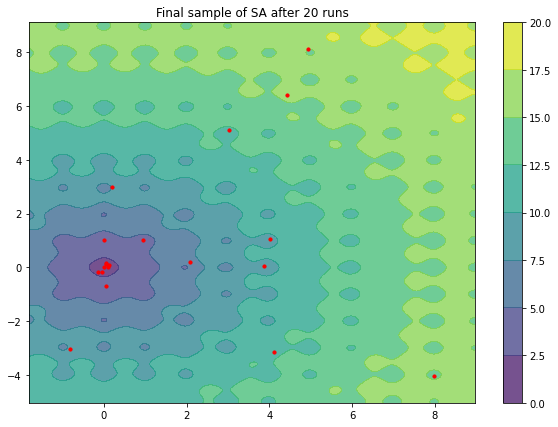

In [194]:
graph(finals)

# Genetic Algorithm

In [ ]:
# Genes: x: [1s (signed), 0.1s, 0.01s, 0.001s, 0.0001s], y: [1s (signed), 0.1s, 0.01s, 0.001s, 0.0001s]
powers = np.power(10.0, np.arange(start=-4, stop=1)[::-1])
def decode(genes):
  return np.dot(genes[:5], powers), np.dot(genes[5:], powers)

In [154]:
#@title Hyperparameters
#@markdown Hyperparameters for the Genetic Algorithm

POP_SIZE = 1000 #@param {type: "number"}
GENERATIONS = 50 #@param {type: "number"}
CROSS_PROB = 0.8 #@param {type: "slider", min: 0, max: 1, step: 0.1}
MUTATE_PROB = 0.1 #@param {type: "slider", min: 0, max: 1, step: 0.1}

#@markdown ---

#@markdown How many runs
RUNS = 20 #@param {type: "number"}

In [144]:
import random
def initialize(pop_size):
  init_pop = []
  for _ in range(pop_size):
    genes_x = np.random.randint(0, high=10, size=5)
    genes_x[0] *= np.random.randint(-5, high=6)
    genes_y = np.random.randint(0, high=10, size=5)
    genes_y[0] *= np.random.randint(-5, high=6)
    init_pop.append(np.concatenate((genes_x, genes_y)))
  return init_pop

In [155]:
best_indiv = []

for _ in range(RUNS):
  population = initialize(POP_SIZE)
  for _ in range(GENERATIONS):
    decs = np.array([decode(i) for i in population])
    fits = np.array([-ackley(g) for g in decs]) # Maximize negative function to get minimum

    best_indices = np.argpartition(fits, -1)[-1]

    # Selection
    fit_norm = fits / np.sum(fits)
    parents = []
    for _ in range(POP_SIZE // 2):
      parents.append(population[np.random.choice(len(population), p=fit_norm)])

    # Crossover
    children = []
    while len(children) + len(parents) < POP_SIZE:
      if random.random() < CROSS_PROB:
        pars = random.sample(parents, 2)
        children.append(np.concatenate((pars[0][:3], pars[1][3:5], pars[1][5:8], pars[1][8:])))
        children.append(np.concatenate((pars[1][:3], pars[0][3:5], pars[1][5:8], pars[0][8:])))
    
    # Mutate
    for child in children:
      for i in range(10):
        if random.random() < MUTATE_PROB:
          child[i] = np.random.randint(0, 9)
      if random.random() < MUTATE_PROB:
        child[0] *= np.random.randint(-5, high=6)
      if random.random() < MUTATE_PROB:
        child[5] *= np.random.randint(-5, high=6)
    
    population = np.concatenate((parents, children))
  best_indiv.append(decs[best_indices])

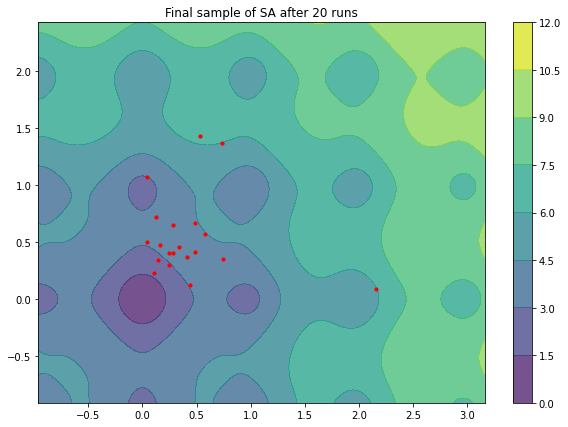

In [195]:
graph(best_indiv)